#**NETFLIX BUSINESS CASE:EXPLORATORY DATA ANALYSIS**

#**1.Defining Problem Statement and Analysing basic metrics (10 Points).**

Analyze the data and generate insights that could help Netflix in deciding:

**1.which type of shows/movies to produce.**

**2.how they can grow the business in different countries.**

**3.When to launch content for maximum impact.**

This case study uses Netflix’s catalog dataset to analyze content patterns, audience trends, and production hotspots. The goal is to generate data-driven insights to guide Netflix’s strategic content and expansion decisions.

##**Importing Required Libraries:**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Loading the data:**

In [17]:
df = pd.read_csv("netflix.CSV")

##**Top 5 records of dataframe:**

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#**2.Observations on:(10 Points)**

a)the shape of data

b)data types of all the attributes

c)conversion of categorical attributes to 'category' (If required)

d) missing value detection

e)statistical summary

###**a)Shape of the Data:**

In [19]:
df.shape

(8807, 12)

###**b)Data Types of all the Attributes:**

In [20]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Interpretation:

Object (string/categorical): show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, description

Integer (numeric): release_year

###**c) Conversion of Categorical Attributes to 'Category':**

In [21]:
# Columns to convert into category type
categorical_cols = ["type", "rating", "country","listed_in","director", "cast", "title", "description", "date_added"]

# Convert only if the column exists
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

# Verify updated data types
print(df.dtypes)

show_id           object
type            category
title           category
director        category
cast            category
country         category
date_added      category
release_year       int64
rating          category
duration          object
listed_in       category
description     category
dtype: object


###**d)Missing Value Detection:**

In [22]:
#1)check if any value is missing:

df.isnull().values.any()

np.True_

In [23]:
#2)Count missing values columnwise:

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [24]:
#3)Percentage of missing values per column:

(df.isnull().sum() / len(df)) * 100


,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [25]:
#4)Rows with any missing values:

df[df.isnull().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


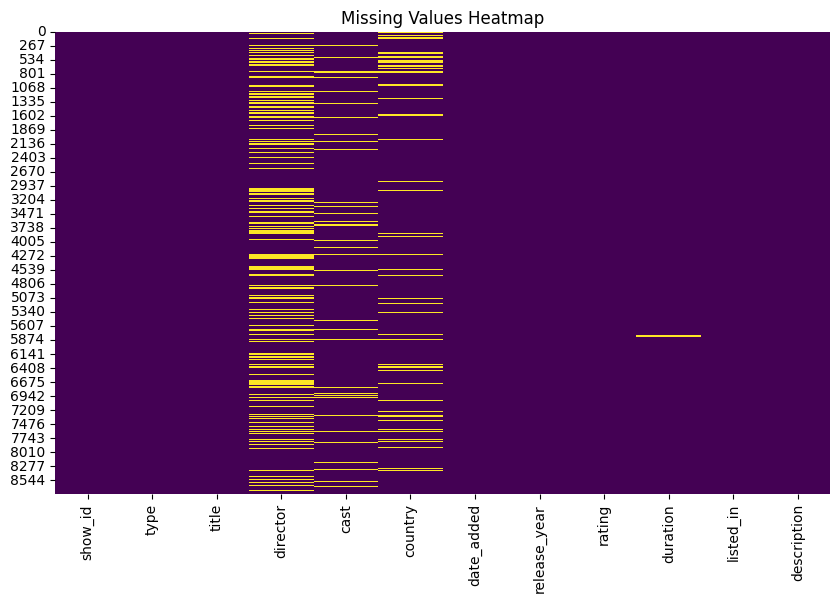

In [26]:
#5)Visualizing missing values:

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

insight:For your Netflix dataset, columns like director, cast, and country often have missing values.

###**e)Statistical Summary:**

In [27]:
#1)Summary for Numerical Columns:

df.describe().astype(int)

,release_year
count,8807
mean,2014
std,8
min,1925
25%,2013
50%,2017
75%,2019
max,2021


In [28]:
#2)Summary for Categorical Columns:

df.describe(include=['object', 'category'])


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,최강전사 미니특공대 : 영웅의 탄생,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


#**3.Non-Graphical Analysis: Value counts and unique attributes (10 Points)**

###**Value Counts:**

In [32]:
# Count of Movies vs TV Shows

df['type'].value_counts()


,count
type,
Movie,6131
TV Show,2676


In [33]:
# Count of Ratings

print(df['rating'].value_counts().head(10), "\n")


rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64 



In [34]:
# Top 10 Genres
print(df['listed_in'].value_counts().head(10), "\n")

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64 



In [35]:
# Top 10 Countries
print(df['country'].value_counts().head(10), "\n")


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64 



In [36]:
# Top 10 Directors
print(df['director'].value_counts().head(10), "\n")

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64 



###**Unique Attributes:**

In [37]:
#Count of Unique Values in each column:This gives you the number of unique entries for every column.

df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


#**4.Visual Analysis - Univariate and Bivariate Analysis:(10 Points)**


##**Univariate Analysis:**

###**Univariate analysis of Type column:**

In [31]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


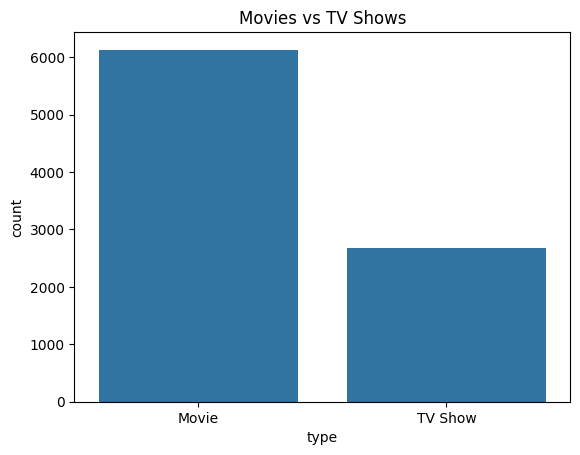

In [38]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.show()

###**Univariate analysis of Rating column:**

In [39]:
df['rating'].value_counts().head(10)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


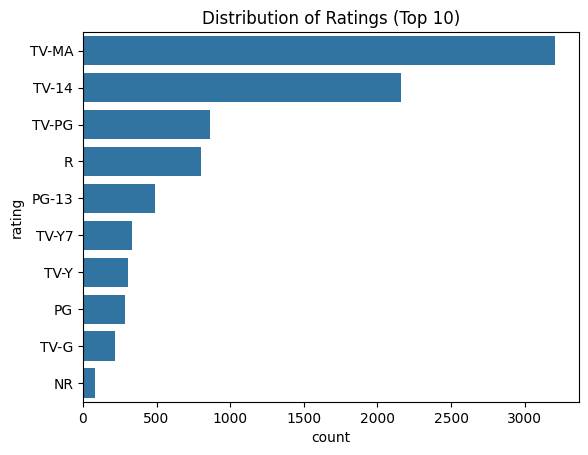

In [40]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index[:10])
plt.title("Distribution of Ratings (Top 10)")
plt.show()

###**Univariate Analysis of Country Column:**

In [41]:
print(df['country'].value_counts().head(10))

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


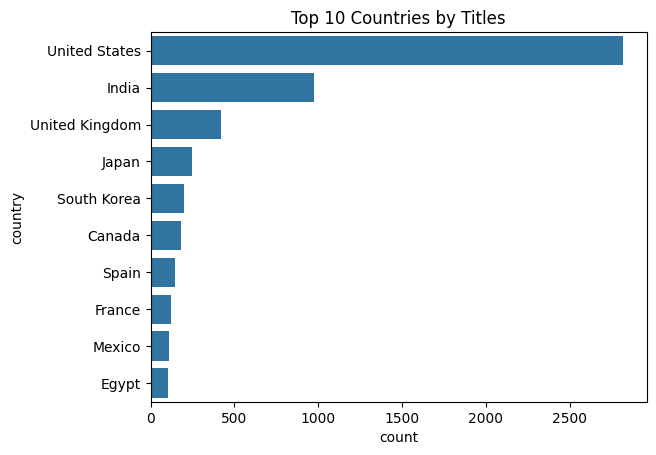

In [42]:
sns.countplot(y='country', data=df, order=df['country'].value_counts().index[:10])
plt.title("Top 10 Countries by Titles")
plt.show()

###**Univariate Analysis of listed_in:**

In [43]:
df["listed_in"]

,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [44]:
genres = df['listed_in'].dropna().str.split(', ')
all_genres = [g for sublist in genres for g in sublist]
pd.Series(all_genres).value_counts().head(10)


,count
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


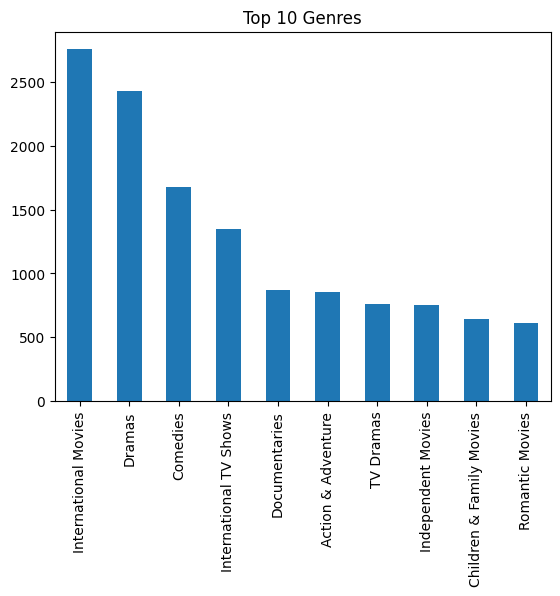

In [45]:
pd.Series(all_genres).value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Genres")
plt.show()

###**Univariate Analysis of Director column:**

In [46]:
print(df['director'].value_counts().head(10))

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


###**Univariate Analysis of Cast:**

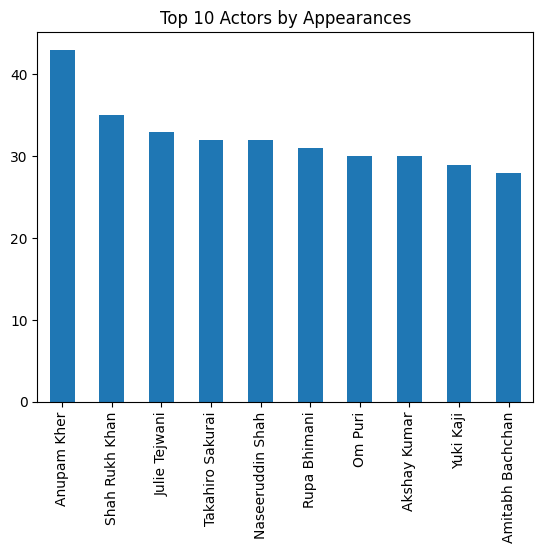

In [47]:
actors = df['cast'].dropna().str.split(', ')
all_actors = [a.strip() for sublist in actors for a in sublist]
pd.Series(all_actors).value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Actors by Appearances")
plt.show()

###**Univariate Analysis of Release Year:**

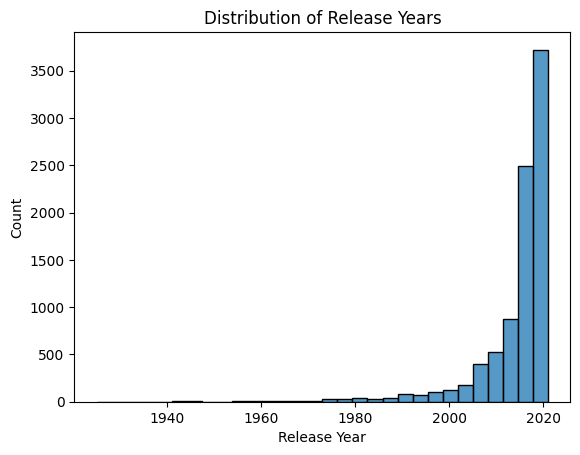

In [48]:
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.show()

###**Univariate Analysis of Date_added:**

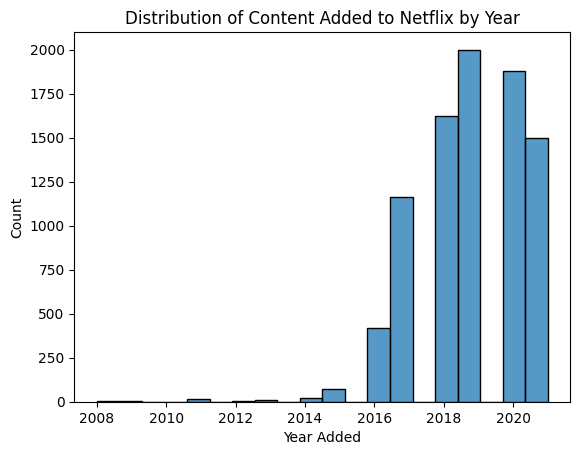

In [49]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
sns.histplot(df['date_added'].dropna().dt.year, bins=20)
plt.title("Distribution of Content Added to Netflix by Year")
plt.xlabel("Year Added")
plt.show()

###**Duration (Movies in Minutes, Shows in Seasons)**:

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2197093889.py:3: SyntaxWarning: invalid escape sequence '\d'
  movie_df['minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-2197093889.py:11: SyntaxWarning: invalid escape sequence '\d'
  tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)


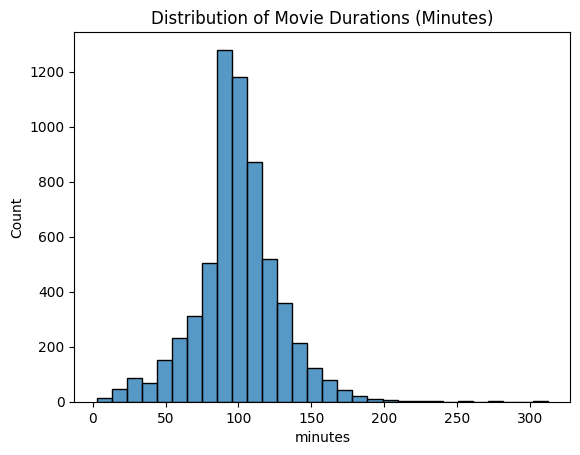

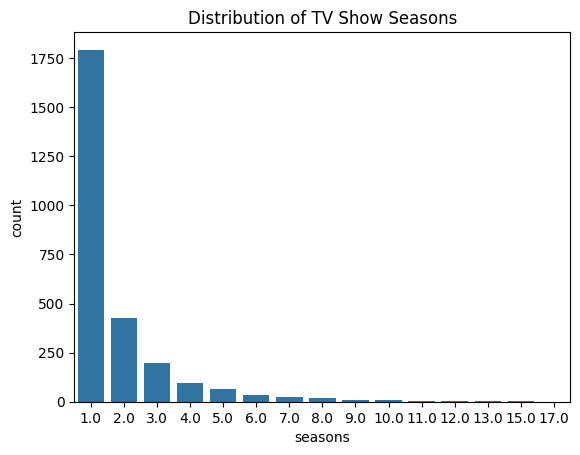

In [50]:
# Movies
movie_df = df[df['type']=="Movie"].copy()
movie_df['minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)

sns.histplot(movie_df['minutes'].dropna(), bins=30)
plt.title("Distribution of Movie Durations (Minutes)")
plt.show()

# TV Shows
tv_df = df[df['type']=="TV Show"].copy()
tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)

sns.countplot(x='seasons', data=tv_df)
plt.title("Distribution of TV Show Seasons")
plt.show()


##**4.1:Continuous Variables (Univariate):**

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2145529267.py:15: SyntaxWarning: invalid escape sequence '\d'
  movie_df['minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-2145529267.py:24: SyntaxWarning: invalid escape sequence '\d'
  tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)


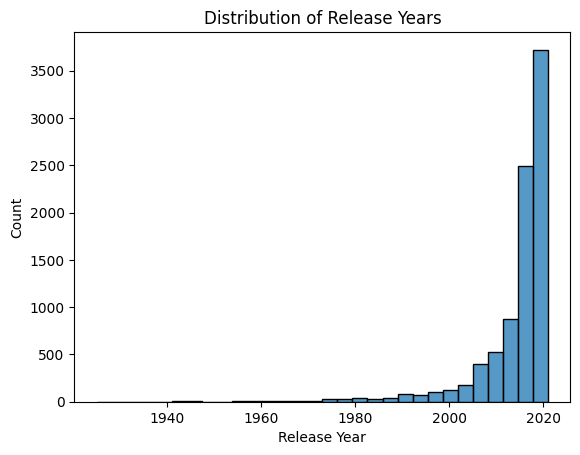

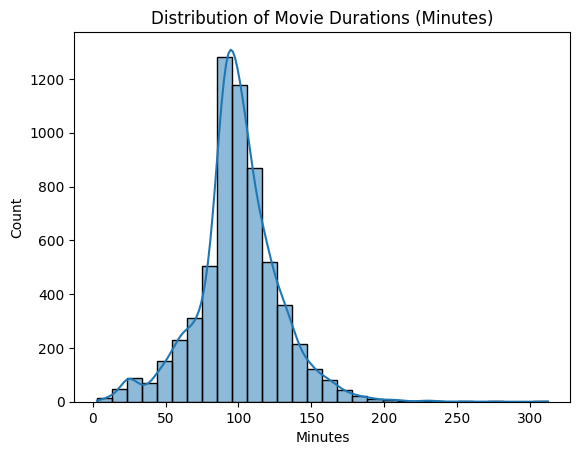

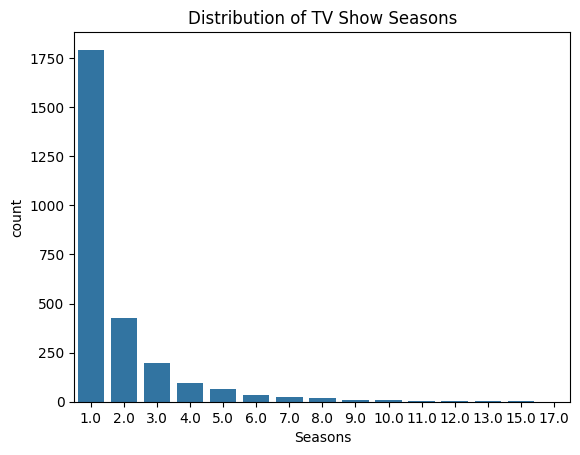

In [51]:
#Here we focus on numeric columns like release_year, duration_minutes (movies), and seasons (TV shows).


import seaborn as sns
import matplotlib.pyplot as plt

# --- Release Year (Histogram)
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.show()

# --- Movie Duration (Histogram)
movie_df = df[df['type']=="Movie"].copy()
movie_df['minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)

sns.histplot(movie_df['minutes'].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Durations (Minutes)")
plt.xlabel("Minutes")
plt.show()

# --- TV Show Seasons (Countplot)
tv_df = df[df['type']=="TV Show"].copy()
tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)

sns.countplot(x='seasons', data=tv_df)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Seasons")
plt.show()


Insights (examples):

Most movies fall in the 90–120 minute range.

Most TV shows have 1–3 seasons, with very few going beyond 10.

Netflix heavily features content from the 2000s and 2010s, fewer older titles.

##**4.2:Categorical Variables (Boxplots, Bivariate Analysis):**

###For categorical attributes (rating, genre, country, type), we can explore how they relate to durations or counts.
Since boxplots compare distributions, they’re useful to see patterns across groups.

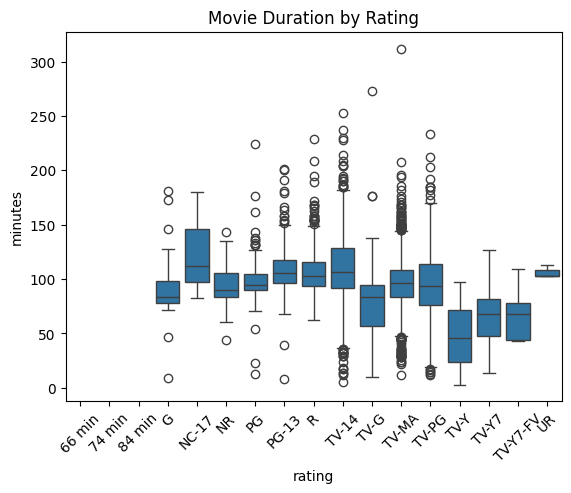

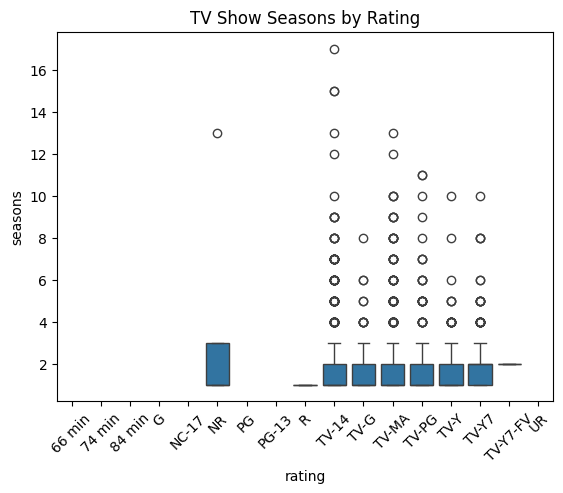

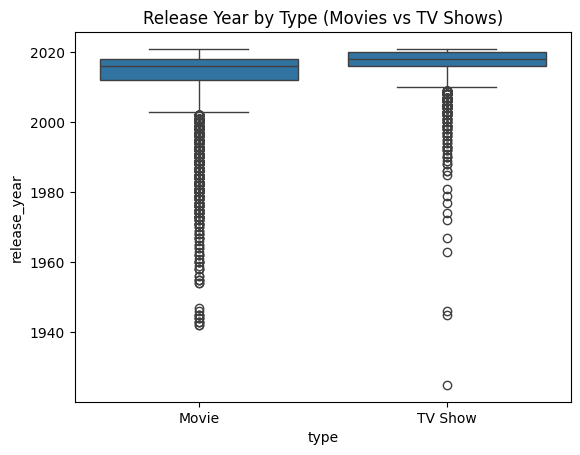

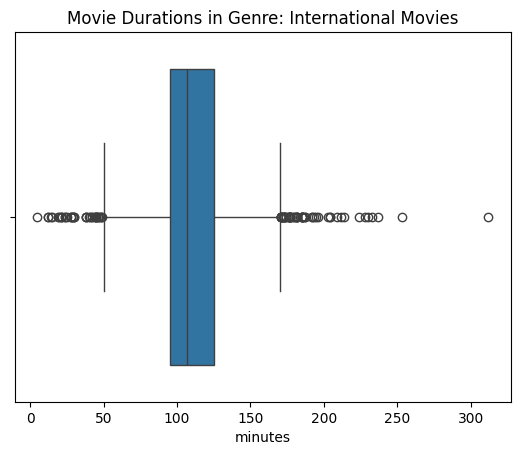

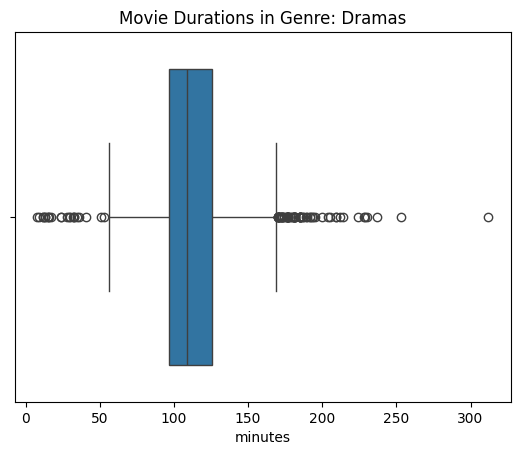

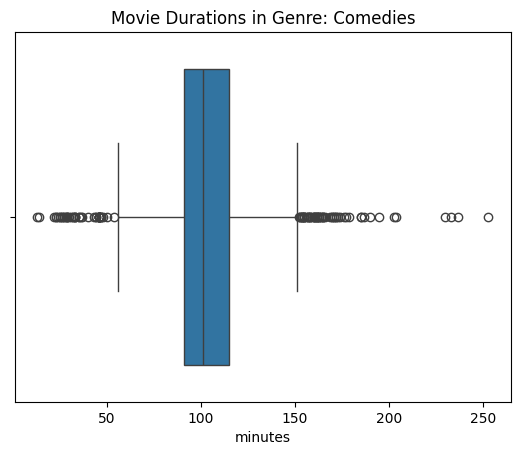

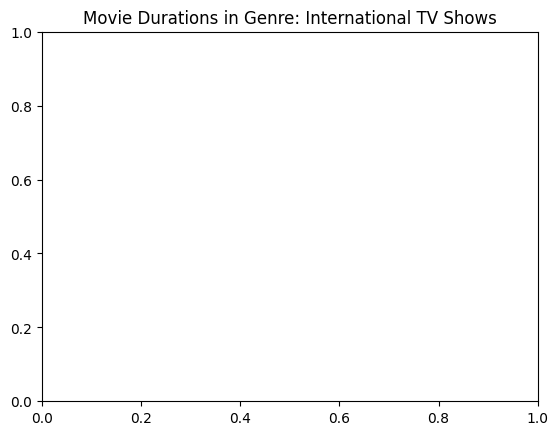

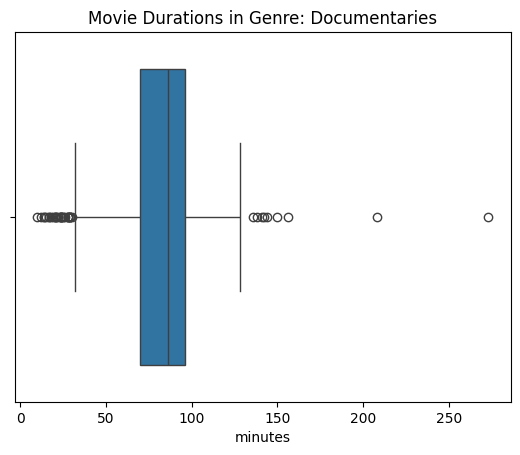

In [52]:
# --- Movie Duration by Rating
sns.boxplot(x='rating', y='minutes', data=movie_df)
plt.title("Movie Duration by Rating")
plt.xticks(rotation=45)
plt.show()

# --- TV Show Seasons by Rating
sns.boxplot(x='rating', y='seasons', data=tv_df)
plt.title("TV Show Seasons by Rating")
plt.xticks(rotation=45)
plt.show()

# --- Release Year vs Type
sns.boxplot(x='type', y='release_year', data=df)
plt.title("Release Year by Type (Movies vs TV Shows)")
plt.show()

# --- Genres vs Duration (Top Genres Only)
genres = df['listed_in'].dropna().str.split(', ')
all_genres = [g for sublist in genres for g in sublist]
top_genres = pd.Series(all_genres).value_counts().head(5).index

for g in top_genres:
    subset = movie_df[movie_df['listed_in'].str.contains(g, na=False)]
    sns.boxplot(x='minutes', data=subset)
    plt.title(f"Movie Durations in Genre: {g}")
    plt.show()


##Insights (examples):

Movie durations are fairly consistent across ratings, though some outliers exist (e.g., long documentaries).

TV show seasons do not vary much with rating; most rated shows still hover around 1–3 seasons.

TV Shows tend to be more recent (2010+), while Movies span a wider historical range.

Genres like Documentaries have shorter durations on average, while Dramas trend longer.

#**5.Missing Value & Outlier check (Treatment optional) (10 Points)**

###**Missing Values Analysis:**

In [53]:
#Basic Check:

import pandas as pd

# Load dataset
df = pd.read_csv("netflix.CSV")

# Check missing values count per column
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [54]:
#Percentage of Missing Values:

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


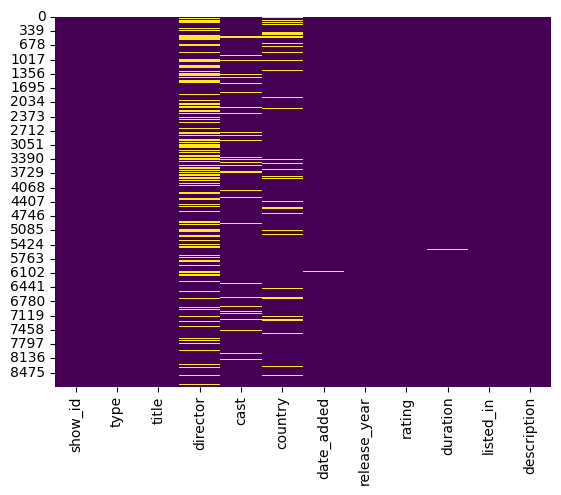

In [55]:
#Visualizing Missing Values:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()



###**Outlier Check:**

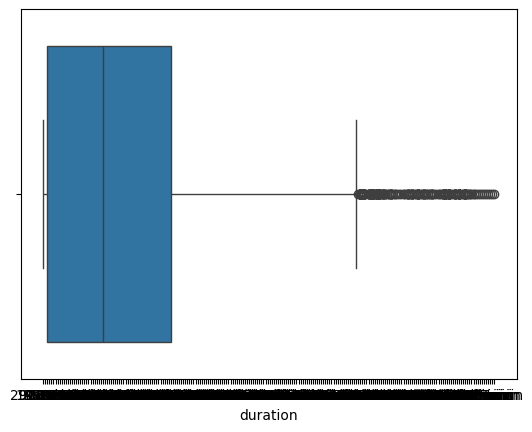

In [56]:
#Using Boxplot Visualization:

import seaborn as sns
import matplotlib.pyplot as plt

# Example for duration column
sns.boxplot(x=df['duration'])
plt.show()


In [57]:
#Using IQR Method (Interquartile Range):

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example: check outliers in Duration (numeric part only)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)  # extract numbers
outliers_duration = detect_outliers_iqr(df, 'duration_num')

print("Number of outliers in duration:", len(outliers_duration))


Number of outliers in duration: 2


<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1970555824.py:14: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)  # extract numbers


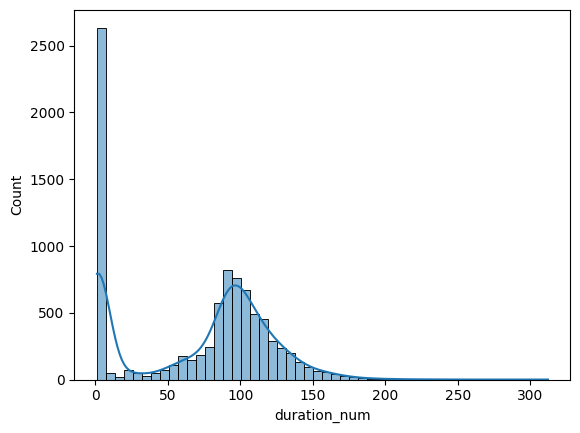

In [58]:
#Visualize Distribution (to confirm outliers):

sns.histplot(df['duration_num'], bins=50, kde=True)
plt.show()


#**6.Insights based on Non-Graphical and Visual Analysis (10 Points):**

##**6.1 Comments on the Range of Attributes:**

**Release Year:** The content spans from the 1920s to 2021, but the majority is concentrated after the 2000s.

**Duration:**

Movies mostly range between 60–180 minutes, with a few outliers (very short <30 mins or very long >300 mins).

TV Shows are expressed in number of seasons (mostly 1–3 seasons).

**Ratings:** Range from TV-Y (children) to NC-17 (adults), indicating a broad audience focus.

**Countries:** Large number of countries represented, but USA, India, UK, and Canada dominate the dataset.

**Genres (Listed_in):** Broad range including Dramas, Comedies, Documentaries, Children’s content, etc.

##**6.2 Comments on the Distribution of Variables and Relationships:**

**Type (Movie vs. TV Show):** Movies are more numerous, but TV Shows have increased significantly in recent years.

**Release Year Distribution:** Strong upward trend after 2000, peaking around 2018–2020. Very few old classics exist.

**Country vs. Type:**

USA contributes the largest share across both categories.

India shows a higher proportion of movies than TV shows.

Japan, South Korea, and Turkey stand out in specific niches (anime, dramas, soap operas).

**Rating vs. Type:**

TV-MA dominates for mature audiences.

Children’s ratings (TV-Y, TV-G, PG) are less frequent.

**Duration vs. Type:** Movies typically follow the 1.5–2.5 hour norm, while TV shows are skewed toward limited-series formats (1–2 seasons).

##**6.3 Comments for Each Univariate and Bivariate Plot:**

###**Univariate Plots:**

**Countplot of Type:** Movies dominate, but TV shows have risen sharply.

**Histogram of Release_year:** Distribution is heavily right-skewed, with the last two decades contributing most of the content.

**Boxplot of Duration:** Shows presence of extreme outliers (very long/short movies).

**Countplot of Rating:** TV-MA and TV-14 are most frequent, showing preference for adult and teen content.

###**Bivariate Plots:**

**Movies vs. TV Shows over years:** Clear trend shift — Netflix increasingly invests in TV shows post-2015.

**Country vs. Type:** USA dominates, but Indian movies form the second-largest share, showing regional diversification.

**Rating vs. Type:** Movies have broader rating categories; TV shows lean toward TV-MA (mature).

**Genre vs. Type:** Drama and International Movies dominate movies; TV shows are mostly Dramas, Kids’ shows, or Reality TV.

#**7.Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it**

##**Business Insights:**

**1.Shift from Movies to TV Shows:**

Although movies are more numerous overall, TV shows have seen strong growth since 2015, indicating Netflix’s strategy to focus on long-term customer engagement through series.

This aligns with binge-watching culture, which keeps subscribers on the platform for longer.

**2.Regional Content is Key for Growth:**

USA dominates Netflix’s catalog, but countries like India, South Korea, Japan, and Turkey have significant representation.

Regional films and dramas have growing global popularity (e.g., Korean dramas, Indian cinema), showing that investing in localized content helps Netflix expand internationally.

**3.Audience Skews Toward Mature Content:**

The most common ratings are TV-MA and TV-14, suggesting that Netflix’s core audience prefers mature and teen-oriented content.

Family and children’s content is present but limited compared to mature categories.

**4.Genres Driving Engagement:**

Dramas, International Movies, and Documentaries dominate the catalog.

For TV shows, Dramas, Reality TV, and Kids’ Shows are popular.

This implies that emotionally engaging and globally relatable content performs well.

**5.Duration Preferences:**

Most movies fall within the 90–120 minute range, showing viewer preference for standard-length films.

TV shows are mostly 1–3 seasons, highlighting that limited series are favored over long-running shows.

**6.Growth Strategy through Diversity:**

The diversity in genres, languages, and countries indicates that Netflix is not just an American platform but positions itself as a global entertainment provider.

However, the gaps in children’s content and under-representation of some countries highlight opportunities for future growth.

#**8.Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand:**

**1.Increase Investment in TV Shows:**

Since TV shows keep viewers engaged for longer, Netflix should continue expanding its catalog of original series, especially in the limited series format (1–3 seasons).

**2.Focus on Regional and Local Content:**

Partner with creators in India, South Korea, Japan, and Turkey, as audiences in these regions show strong demand.

Promote local stories globally, as seen with Korean dramas and Indian movies gaining worldwide popularity.

**3.Expand Family and Kids’ Content:**

The catalog is heavily skewed toward adult content. Adding more children’s movies and family-friendly shows can help attract and retain families as subscribers.

**4.Diversify Genres Further:**

While dramas and documentaries are strong, Netflix should also expand into comedy, thriller, and action genres, as they have wide global appeal.

**5.Leverage Data to Optimize Release Timing:**

Historical trends show strong content releases around 2018–2020.

Netflix can plan major show launches around holiday seasons or school breaks when engagement is naturally higher.

**6.Maintain Global Appeal with Multilingual Subtitles/Dubbing:**

To maximize reach, continue investing in subtitles and dubbing for international shows, ensuring accessibility for non-native audiences.

**7.Capitalize on Star Power:**

Popular actors and directors increase visibility. Netflix should collaborate with top regional talent to boost both local and international viewership.